# Discussion (Lab 3 Part 1)

### Joel Aaron Marquez, ENSF 511, W2022

##### The results from applying model optimization

In [1]:
# Libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.DataFrame({
    "MobileNet2_Optimization" : ["Base","Pruning","Clustering","Quantization","All_Three"],
    "Accuracy" : [97.92,97.40,97.40,97.4,96.875],
    "ModelSize" : [8665,8665,8665,4371,4371]
})

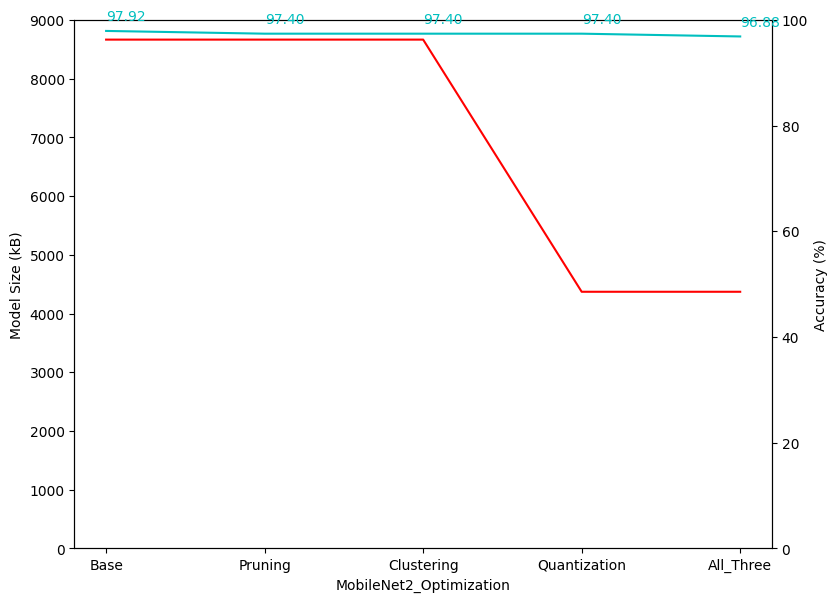

In [3]:
plt.figure(figsize=(9, 7), dpi=100)
ax = sns.lineplot(y=df.ModelSize, color="r", x = df.MobileNet2_Optimization)
ax.set_ylabel("Model Size (kB)")
ax.set_ylim([0,9000])
ax2 = ax.twinx()
ax2.set_ylim([0, 100])
ax2.set_ylabel("Accuracy (%)")

for x,y in zip(df.MobileNet2_Optimization, df.ModelSize):
    label = "{:.3f}".format(y)
    plt.annotate(label,(x,y), color = "r") 

sns.lineplot(y=df.Accuracy, color="c", ax=ax2, x = df.MobileNet2_Optimization)

for x,y in zip(df.MobileNet2_Optimization, df.Accuracy):
    
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y+2), ha = 'left', color = "c")

**Figure 1 (above). Accuracy and Model Size vs. Model Optimization**

**Figure 2. Model Size of the models**
![fine-tune code](..//images-for-discussion//model_size.jpg)

Figure 1 and 2 above shows very interesting results. From the base model without any optimzation provided from the tensorflow_model_optimization library, the accuracy (evaluated with the test_dataset) was 97.92% with the model size of 8665 kB. When I started to implement some of the optimzations, particularly with clustering and pruning, the **model size did not make a difference** at all (both remained at 8665 kB). The only difference was the accuracy when applying these optimizations. I am not completely sure what the reason is but I have three guesses:

1. The inconsistency of the training (likely the seed set in the model, it cannot be reproduced from the base model.

2. The code is not implemented correctly (e.g., incorrect parameters when optimizing model, the layers of the model was not properly unfrozen) 

3. Exporting the model TFLite model couldn't reduce the size further.

Reason 2 is one likely possibility. After training the models and noticing the unexpected result, I realized the provided code forgot to enable all layers of the base_model (the mobilenet_v2 model) before freezing them to the provided layer (refer to Figure 2).

**Figure 3. The code to fine-tune the model (notice the missing line *base_model.trainable = True*, before freezing them again)**
![fine-tune code](..//images-for-discussion//fine-tune.jpg)

Reason 3 is another likely hypothesis due to how **tflite appears to make very little difference in the model size reduction**, explaining why the optimization does little to make a difference. The reason I believe that this could be the case is because in the official website on model optimization (link [here](https://www.tensorflow.org/model_optimization/guide/get_started)), the examples given show how minor of a difference it makes when exporting the model (refer to figures model 2 and 3 below). However, it is still strange that the model size did not reduce at all compared to the base version if the tensorflow example still worked but is less effective.

**Figure 4. Clustering Model Size Reduction [Image from Tensorflow]**
![mobilenet_v2(clustering)](..//images-for-discussion//model_reduction_clustering.jpg)

**Figure 5. Pruning Model Size Reduction [Image from Tensorflow]**
![mobilenet_v2(pruning)](..//images-for-discussion//model_reduction_pruning.jpg)

Aside from the unexpected results, the **quantization optimization made a considerable difference in the model size**. From the tensorflow webisite on optimization (link [here](https://www.tensorflow.org/lite/performance/post_training_quantization)), they listed a bunch of possible methods to use. I chose the Float16 quantization and as expected, the model size almost halved (8665 kB vs 4371 kB).

In terms of accuracy, it seems that applying these optimizations will have **very small reduction of accuracy**. It reinforces how these methods can help reduce computational resources while still being very reliable. Although, it is interesting to note how each optimization individually had an identical accuracy of 97.4% but reduced to 96.88% when all three were used.

##### Next Steps...

I tried retraining the pruning model. I correctted the code from Figure 3 (fixed it as shown in Figure 6) and changed some parameters to test and see if that would make a difference in the model size. The two parameters in how sparsity will be applied in each epoch changed initial sparsity of 50% to 0% and final sparsity of 80% to 50% (Figure 7 below). In addition, because of the limited time, I increased the layers frozen from 100 to 145 (from 2 trainable variables to 11) to save some time. Unfortunately, the model size did not make a difference (shown in Figure 2 called model(pruning3).tflite). Perhaps next time, I can fine-tune more layers for both clustering and pruning to see if it is more effective in model reduction.

**Figure 6. Fixing the fine-tune code block**
![fine tune fixed](..//images-for-discussion//fine-tune-fixed.jpg)

**Figure 7. Old Parameters (Left) and New Parameters (Right) for the sparsity of the pruning**
![sparsity parameters](..//images-for-discussion//sparsity_params.jpg)